<a href="https://colab.research.google.com/github/FabioLofredo/Exercises-for-Data-Science/blob/main/Exercise_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Exercise

##1
You will need to import 3 files from the folder as data frames into your Jupyter
notebook

o u.data

o u.item

o u.user

(You might encounter some trouble importing the data, you are expected to
figure out on your own)

In [ ]:
pip install chardet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# look at the first ten thousand bytes to guess the character encoding
import chardet
with open("/content/u.item", 'rb') as rawdata:
    result = chardet.detect(rawdata.read(100000))

# check what the character encoding might be
print(result["encoding"])



ISO-8859-1


In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns



data = pd.read_csv('/content/u.data',sep = '\t',names="user id | item id | rating | timestamp".split(' | '))
item = pd.read_csv('/content/u.item',sep = '|',encoding = result["encoding"],names="movie id | movie title | release date | video release date | IMDb URL | unknown | Action | Adventure | Animation | Children's | Comedy | Crime | Documentary | Drama | Fantasy | Film-Noir | Horror | Musical | Mystery | Romance | Sci-Fi | Thriller | War | Western".split(" | "))  
user = pd.read_csv('/content/u.user',sep = '|',names="user id | age | gender | occupation | zip code".split(' | ') )  

print(data)

       user id  item id  rating  timestamp
0          196      242       3  881250949
1          186      302       3  891717742
2           22      377       1  878887116
3          244       51       2  880606923
4          166      346       1  886397596
...        ...      ...     ...        ...
99995      880      476       3  880175444
99996      716      204       5  879795543
99997      276     1090       1  874795795
99998       13      225       2  882399156
99999       12      203       3  879959583

[100000 rows x 4 columns]


##2
Display univariate plots of the attributes: 'rating', 'age', 'release date', 'gender' and
'occupation', from their respective data frames

In [ ]:
data.isna().sum()

user id      0
item id      0
rating       0
timestamp    0
dtype: int64

In [ ]:
item.isna().sum()

movie id                 0
movie title              0
release date             1
video release date    1682
IMDb URL                 3
unknown                  0
Action                   0
Adventure                0
Animation                0
Children's               0
Comedy                   0
Crime                    0
Documentary              0
Drama                    0
Fantasy                  0
Film-Noir                0
Horror                   0
Musical                  0
Mystery                  0
Romance                  0
Sci-Fi                   0
Thriller                 0
War                      0
Western                  0
dtype: int64

In [ ]:
user.isna().sum()

user id       0
age           0
gender        0
occupation    0
zip code      0
dtype: int64

In [ ]:
item["release date"].isnull().sum()

1

<ipython-input-62-7555976aefba>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  item['year'][i] = x.year
/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


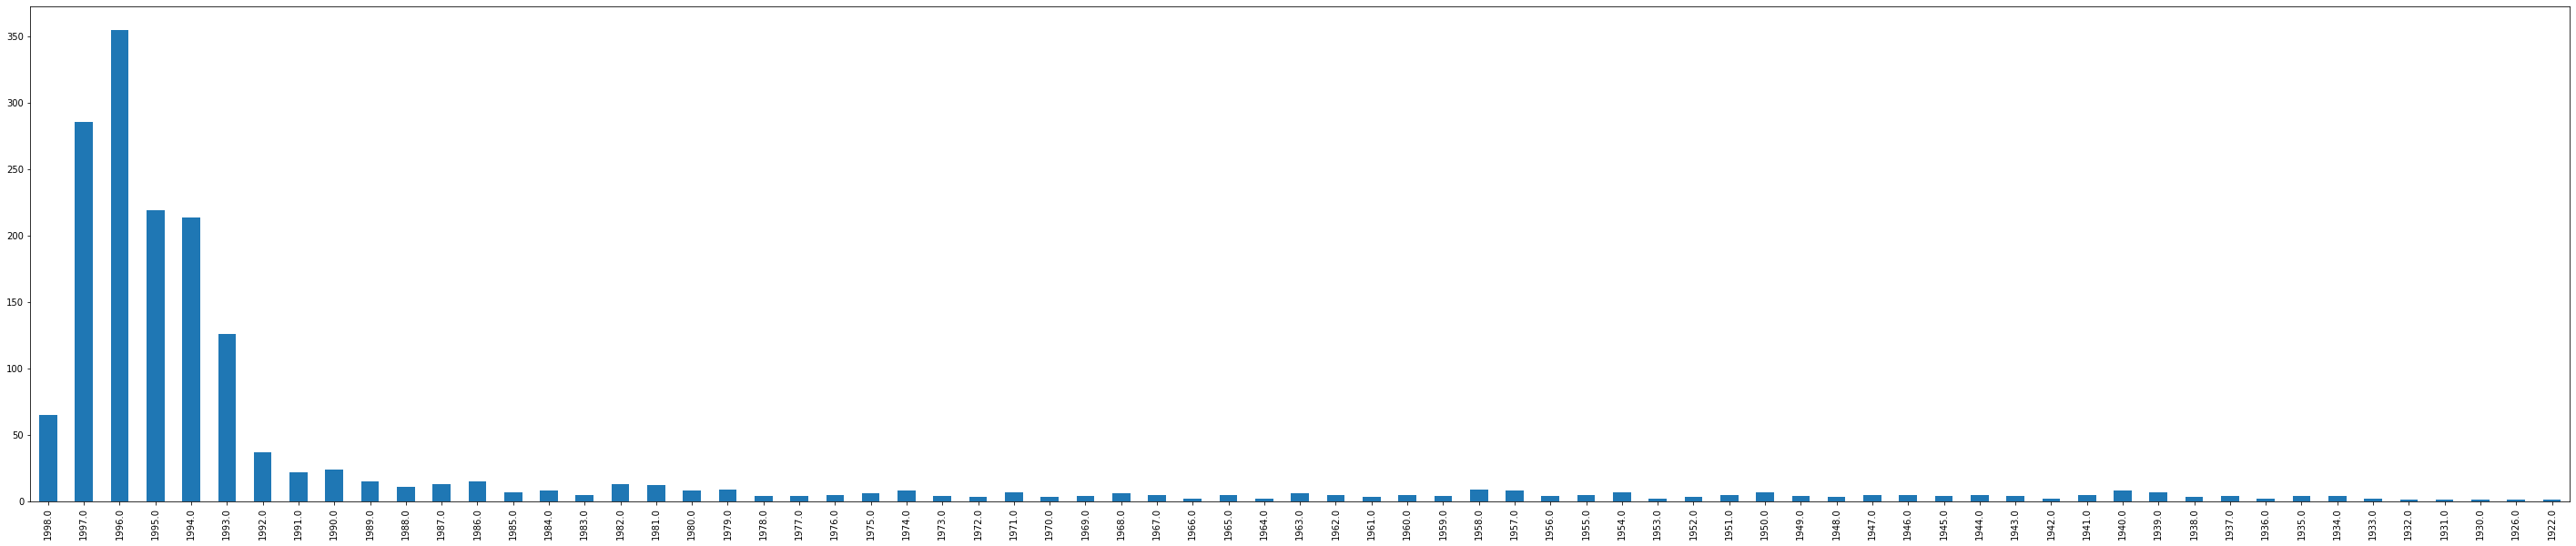

In [ ]:
import datetime as dt
import numpy as np
a=[]
i=0
item['year']=item["movie id"]
for x in pd.to_datetime(item["release date"]):
  if x != None:
    item['year'][i] = x.year
  else:
    item['year'][i] = None
  i+=1
z = pd.Series(item["year"],dtype="int",name= "teste") 
#z.value_counts().plot(kind = "bar", figsize=(50,10))
#z.teste = z.teste.astype(int)
#z['teste'] = z['teste'].astype(np.int64)
#z["teste"] = z["teste"].apply(np.int64)

z.value_counts().sort_index(ascending=False).plot(kind = "bar", figsize=(50,10))
#print(type(item['release year'][1]))
#item['release year']= item['release year'].astype("int")
#print(z.value_counts())
#print(z.value_counts().sort_index(ascending=False))
#print(z.head(25))

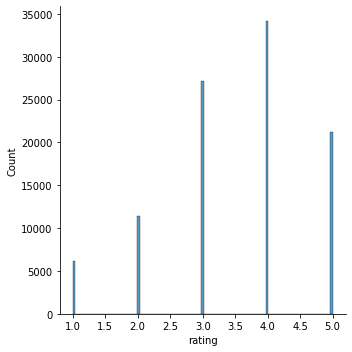

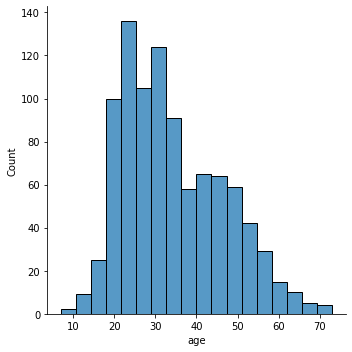

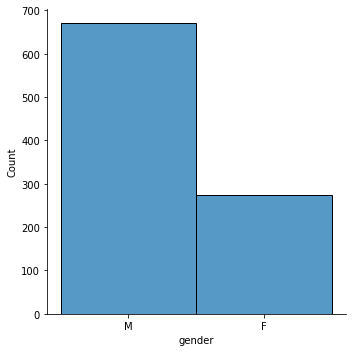

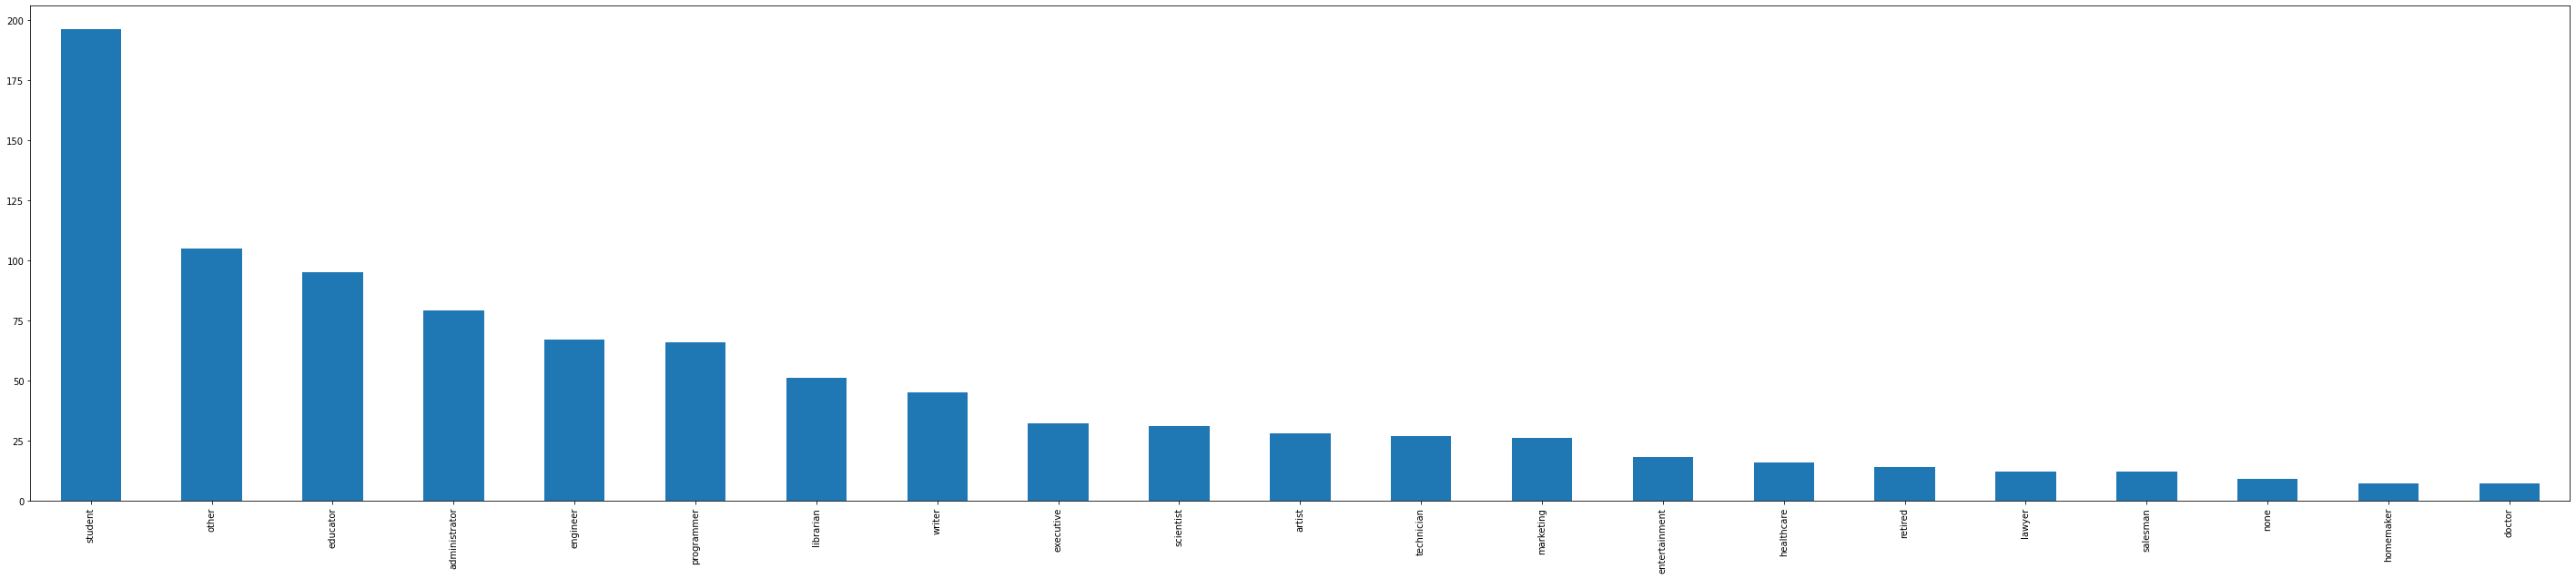

In [ ]:
sns.displot(data["rating"])
#plt.hist(data["rating"], bins=8)
#plt.xticks([1,2,3,4,5],["1"])

#ax.set_xticklabels(x[::2], rotation=45)
#plt.show()
sns.displot(user["age"])
#sns.displot(item["release date"])
sns.displot(user["gender"])
plt.show()
#sns.displot(user["occupation"])
user["occupation"].value_counts().plot(kind = "bar", figsize=(50,10))



##3
Visualize how popularity of Genres has changed over the years. From the graph
one should be able to see for any given year, movies of which genre got released
the most.

        unknown  Action  Adventure  Animation  Children's  Comedy  Crime  \
1998.0      0.0    12.0        3.0        0.0         1.0    13.0    7.0   
1997.0      0.0    46.0       20.0        3.0        22.0    87.0   30.0   
1996.0      0.0    44.0       24.0        9.0        21.0   108.0   21.0   
1995.0      0.0    40.0       22.0        6.0        21.0    63.0   11.0   
1994.0      0.0    30.0       13.0        4.0        15.0    82.0    8.0   
...         ...     ...        ...        ...         ...     ...    ...   
1931.0      0.0     0.0        0.0        0.0         0.0     0.0    1.0   
1930.0      0.0     0.0        0.0        0.0         0.0     0.0    0.0   
1926.0      0.0     0.0        0.0        0.0         0.0     0.0    0.0   
1922.0      0.0     0.0        0.0        0.0         0.0     0.0    0.0   
NaN         1.0     0.0        0.0        0.0         0.0     0.0    0.0   

        Documentary  Drama  Fantasy  Film-Noir  Horror  Musical  Mystery  \
1998.0     

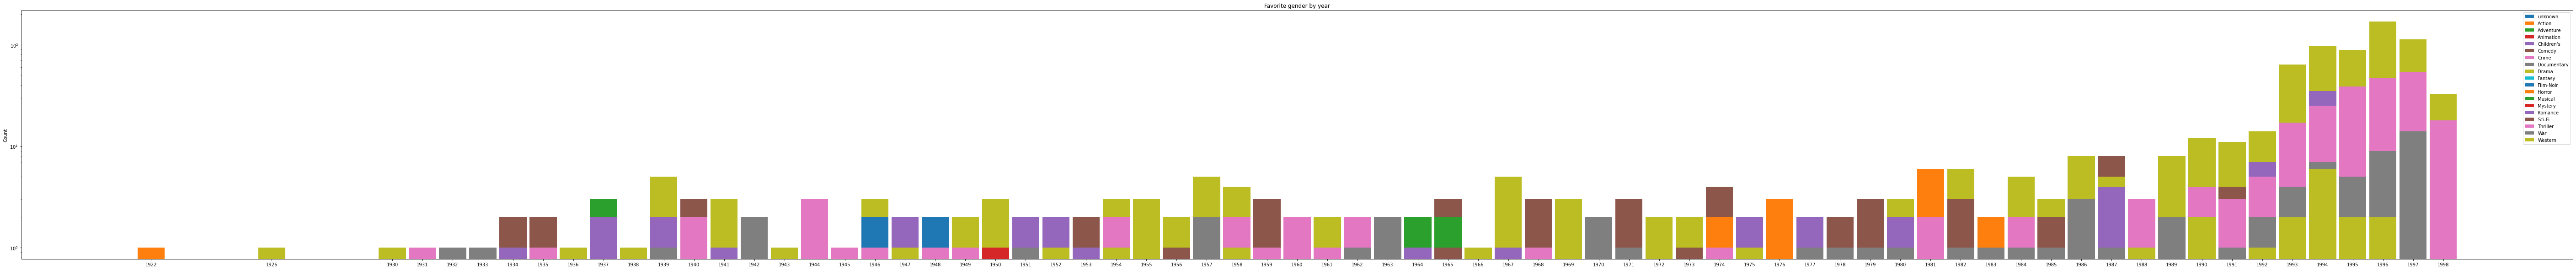

In [ ]:


set_dates = set(item['year'])
list_dates = list(set_dates)
serie_year = pd.Series(list_dates).sort_index(ascending=False) 
#print(serie_year)
df = pd.DataFrame(item["year | unknown | Action | Adventure | Animation | Children's | Comedy | Crime | Documentary | Drama | Fantasy | Film-Noir | Horror | Musical | Mystery | Romance | Sci-Fi | Thriller | War | Western".split(" | ")])
df.set_index("year",inplace=True) 
df_end = pd.DataFrame(item["unknown | Action | Adventure | Animation | Children's | Comedy | Crime | Documentary | Drama | Fantasy | Film-Noir | Horror | Musical | Mystery | Romance | Sci-Fi | Thriller | War | Western".split(" | ")],index =serie_year )
#print(df)
#print(df_end)

#changing NaN to 0 in df_end
for index_end,values_end in df_end.iterrows():
  for x in df_end.loc[index_end].keys():
    df_end.loc[index_end][x] = 0

#Summing df in df_end
for index_df, values_df in df.iterrows():
  for x in df_end.loc[index_df].keys():
    df_end.loc[index_df][x] += values_df[x]
print(df_end)

width = 0.9      # the width of the bars: can also be len(x) sequence

fig, ax = plt.subplots(figsize=(100,10))
print(type(df_end.index))
print(df_end["Western"].values.astype(int))
for x in df_end.columns:
  if x != None:
    ax.bar(df_end.index, df_end[x].values.astype(int), width, label=x)


#aaa = np.add(women_means,men_means)
#ax.bar(labels, men_means, width, label='Men')
#ax.bar(labels, women_means, width, label='Women',bottom=men_means)
#ax.bar(labels, men_means, width, label='3',bottom=aaa)
ax.set_yscale('log')
ax.set_ylabel('Count')
ax.set_title('Favorite gender by year')
ax.legend()
df_end.dropna()

lst_anos = df_end.sort_index().index
plt.xticks(lst_anos,(lst_anos).dropna().astype(int))
#df_end.index_sort_values

#print(df.isnull())
#plt.xticks(df_end.index)
#ax.set_xticklabels(x[::2], rotation=45)
#plt.xticks(df_end.index, rotation='vertical')
#plt.xticks?#(x, df_end.index, rotation='vertical')
#ax.set_xticklabels(df_end.index.astype(str))
plt.show()
#print(type(df_end.index)


##4
Display the top 25 movies by average rating, as a list/series/dataframe.
Note:- Consider only the movies which received atleast a 100 ratings

In [ ]:
print(data)

       user id  item id  rating  timestamp
0          196      242       3  881250949
1          186      302       3  891717742
2           22      377       1  878887116
3          244       51       2  880606923
4          166      346       1  886397596
...        ...      ...     ...        ...
99995      880      476       3  880175444
99996      716      204       5  879795543
99997      276     1090       1  874795795
99998       13      225       2  882399156
99999       12      203       3  879959583

[100000 rows x 4 columns]


In [ ]:
#print(data["rating"])
#data["item id"]
#print(data.isna().sum())

set_id = set(data['item id'])
list_id = list(set_id)
serie_id = pd.Series(list_id).sort_index(ascending=False) 
#print(serie_id)
df_end = pd.DataFrame(columns =["quantity","rating sum","rating avg"],index = serie_id)
df_end.fillna(0, inplace = True)
print(df_end)
#print(data.index())
for index_data,values_data in data.iterrows():
  #print(values_data["item id"])
  df_end["quantity"][values_data["item id"]] +=1
  df_end["rating sum"][values_data["item id"]] += values_data["rating"]
  #print(df_end["quantity"][4])
  #print(df_end["rating sum"][4])
df_end["rating avg"]= df_end["rating avg"].astype(float)
for index_data,values_data in df_end.iterrows():
  df_end["rating avg"][index_data] = (df_end["rating sum"][index_data]).astype(float)/(df_end["quantity"][index_data]).astype(float)
print(df_end)



      quantity  rating sum  rating avg
1682         0           0           0
1681         0           0           0
1680         0           0           0
1679         0           0           0
1678         0           0           0
...        ...         ...         ...
5            0           0           0
4            0           0           0
3            0           0           0
2            0           0           0
1            0           0           0

[1682 rows x 3 columns]


<ipython-input-66-aa6d88d29671>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_end["rating avg"][index_data] = (df_end["rating sum"][index_data]).astype(float)/(df_end["quantity"][index_data]).astype(float)


      quantity  rating sum  rating avg
1682         1           3    3.000000
1681         1           3    3.000000
1680         1           2    2.000000
1679         1           3    3.000000
1678         1           1    1.000000
...        ...         ...         ...
5           86         284    3.302326
4          209         742    3.550239
3           90         273    3.033333
2          131         420    3.206107
1          452        1753    3.878319

[1682 rows x 3 columns]


In [ ]:

print(df_end[df_end["quantity"]>99].sort_values(by="rating avg",ascending=False).head(25))


     quantity  rating sum  rating avg
408       112         503    4.491071
318       298        1331    4.466443
169       118         527    4.466102
483       243        1083    4.456790
64        283        1258    4.445230
603       209         917    4.387560
12        267        1171    4.385768
50        583        2541    4.358491
178       125         543    4.344000
134       198         850    4.292929
427       219         940    4.292237
357       264        1133    4.291667
98        390        1673    4.289744
480       179         767    4.284916
127       413        1769    4.283293
285       162         691    4.265432
272       198         844    4.262626
657       131         558    4.259542
474       194         825    4.252577
174       420        1786    4.252381
479       179         761    4.251397
313       350        1486    4.245714
511       173         732    4.231214
484       138         581    4.210145
172       367        1543    4.204360


##5
Verify the following statements (no need of doing a statistical test. Compare
absolute numbers):

o Men watch more drama than women

o Men watch more Romance than women

o Women watch more Sci-Fi than men

In [ ]:
#data = pd.read_csv('/content/u.data',sep = '\t',names="user id | item id | rating | timestamp".split(' | '))
#item = pd.read_csv('/content/u.item',sep = '|',encoding = result["encoding"],names="movie id | movie title | release date | video release date | IMDb URL | unknown | Action | Adventure | Animation | Children's | Comedy | Crime | Documentary | Drama | Fantasy | Film-Noir | Horror | Musical | Mystery | Romance | Sci-Fi | Thriller | War | Western".split(" | "))  
#user = pd.read_csv('/content/u.user',sep = '|',names="user id | age | gender | occupation | zip code".split(' | ') )  
df_temp = item.copy()
for x in "release date | video release date | IMDb URL | unknown | Action | Adventure | Animation | Children's | Comedy | Crime | Documentary | Drama | Fantasy | Film-Noir | Horror | Musical | Mystery | Romance | Sci-Fi | Thriller | War | Western".split(" | "):
  if (x == "Drama") or (x ==  "Romance") or (x == "Sci-Fi"):
    a=0
  else:
    df_temp.drop(x,axis=1,inplace=True)

df1 = user.set_index("user id").join(data.set_index("user id"), lsuffix='_caller', rsuffix='_other',how = "inner")
df2 = df1.set_index("item id").join(df_temp.set_index("movie id"), lsuffix='_caller', rsuffix='_other',how = "inner")
print (df2.head(50))


   age gender     occupation zip code  rating  timestamp       movie title  \
1   24      M     technician    85711       5  874965758  Toy Story (1995)   
1   53      F          other    94043       4  888550871  Toy Story (1995)   
1   33      F          other    15213       4  875635748  Toy Story (1995)   
1   42      M      executive    98101       4  883599478  Toy Story (1995)   
1   53      M         lawyer    90703       4  877888877  Toy Story (1995)   
1   47      M       educator    29206       3  882140487  Toy Story (1995)   
1   49      F       educator    97301       1  879455635  Toy Story (1995)   
1   21      M  entertainment    10309       5  877717833  Toy Story (1995)   
1   30      M     programmer    06355       4  885272579  Toy Story (1995)   
1   35      F          other    37212       5  880130802  Toy Story (1995)   
1   42      F      homemaker    95660       3  879667963  Toy Story (1995)   
1   26      M         writer    30068       5  874951244  Toy St

In [ ]:
#print(df2)
print(df2.groupby("gender").sum())
print(df2["gender"].value_counts())

serie_movie_man = df2.groupby("gender").sum().loc["M"]
serie_movie_woman = df2.groupby("gender").sum().loc["F"]
total_man = df2["gender"].value_counts()["M"]
total_woman = df2["gender"].value_counts()["F"]
print(serie_movie_man)
print("man/woman ratio for Drama:")
x = (serie_movie_man["Drama"]/total_man)/(serie_movie_woman["Drama"]/total_woman)
print (x)
print("man/woman ratio for Romance:")
x = (serie_movie_man["Romance"]/total_man)/(serie_movie_woman["Romance"]/total_woman)
print (x)
print("man/woman ratio for Sci-Fi:")
x = (serie_movie_man["Sci-Fi"]/total_man)/(serie_movie_woman["Sci-Fi"]/total_woman)
print (x)

            age  rating       timestamp  Drama  Romance  Sci-Fi         year
gender                                                                      
F        831781   90901  22750324303258  11008     5858    2629   51177156.0
M       2465204  262085  65602560845604  28887    13603   10101  147600574.0
M    74260
F    25740
Name: gender, dtype: int64
age          2.465204e+06
rating       2.620850e+05
timestamp    6.560256e+13
Drama        2.888700e+04
Romance      1.360300e+04
Sci-Fi       1.010100e+04
year         1.476006e+08
Name: M, dtype: float64
man/woman ratio for Drama:
0.9095940655161938
man/woman ratio for Romance:
0.8048944418202697
man/woman ratio for Sci-Fi:
1.3317643426297066


o Men watch more drama than women = False

o Men watch more Romance than women = False

o Women watch more Sci-Fi than men = False